In [1]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # this controls figure size in the notebook

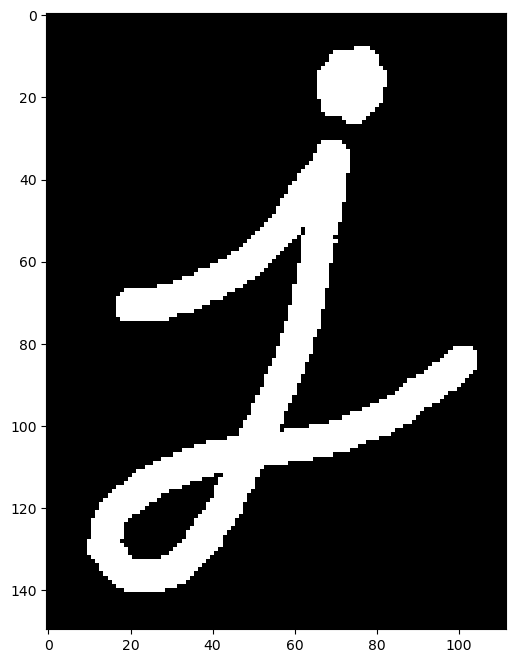

In [2]:
img1 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\j0.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
plt.imshow(img1, cmap="gray")

Text(0.5, 1.0, 'Erode')

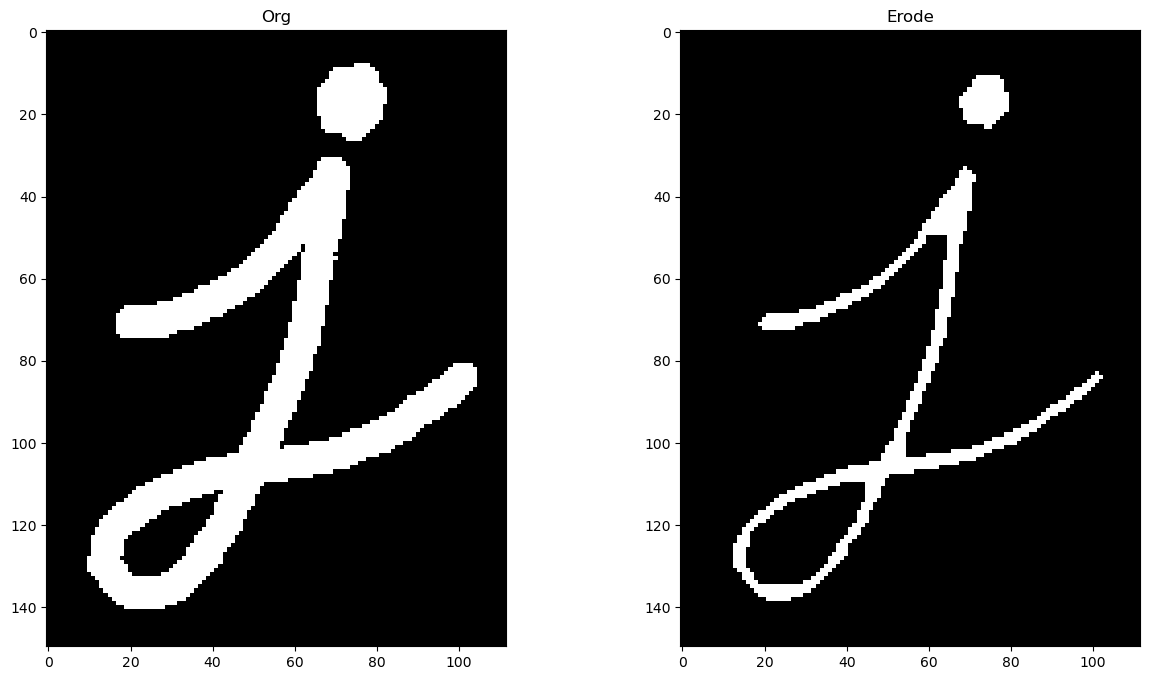

In [3]:
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(img1, kernel, iterations=1)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img1, cmap='gray')
ax1.set_title("Org")
ax2.imshow(erosion, cmap='gray')
ax2.set_title("Erode")

Text(0.5, 1.0, 'Dilate')

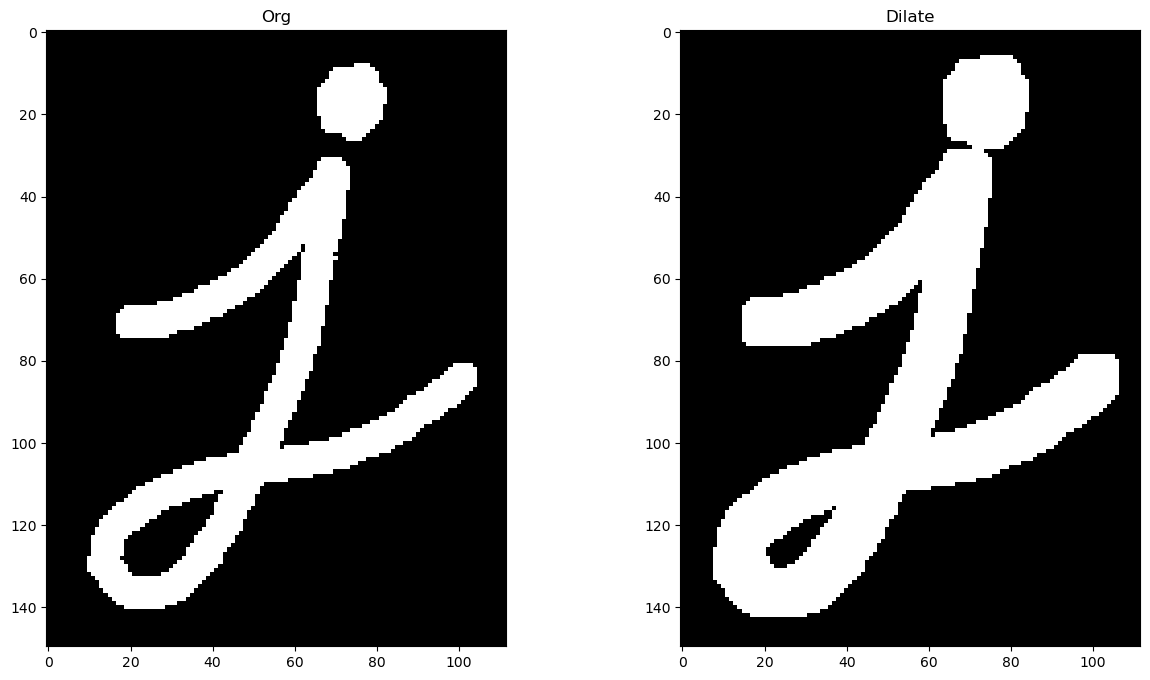

In [4]:
kernel = np.ones((5,5), np.uint8)
dilatacion = cv.dilate(img1, kernel, iterations=1)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img1, cmap='gray')
ax1.set_title("Org")
ax2.imshow(dilatacion, cmap='gray')
ax2.set_title("Dilate")

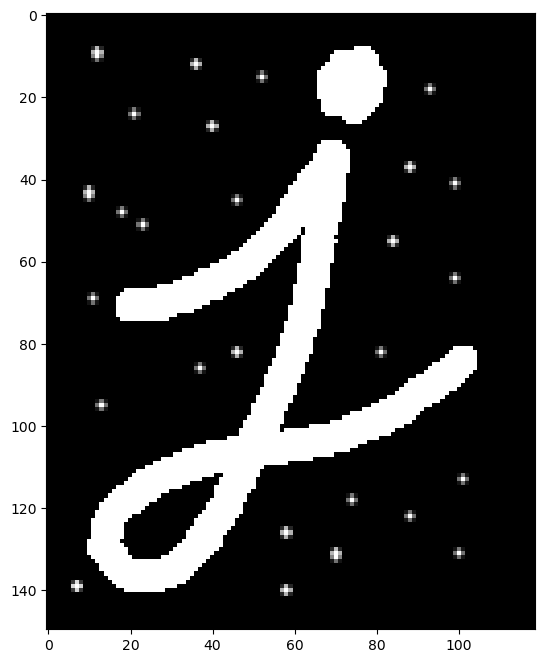

In [6]:
img2 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\j1.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(img2, cmap="gray")

Text(0.5, 1.0, 'Opening')

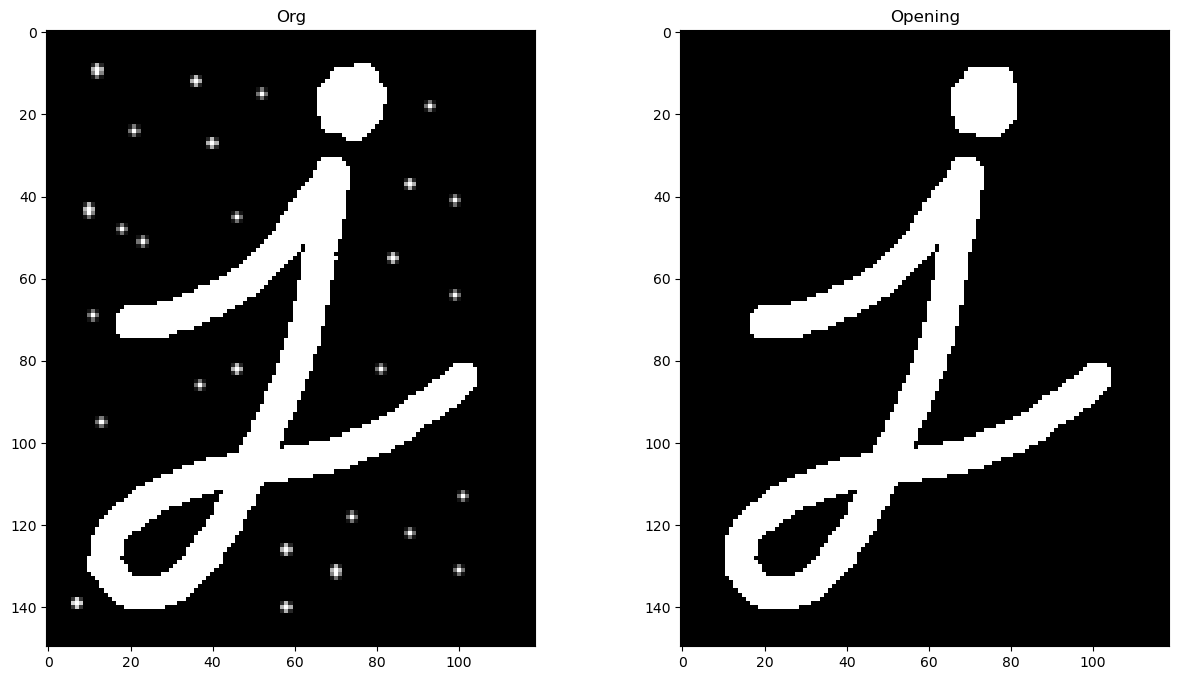

In [8]:
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(img2, cmap='gray')
ax1.set_title("Org")
ax2.imshow(opening, cmap='gray')
ax2.set_title("Opening")

Text(0.5, 1.0, 'Closing')

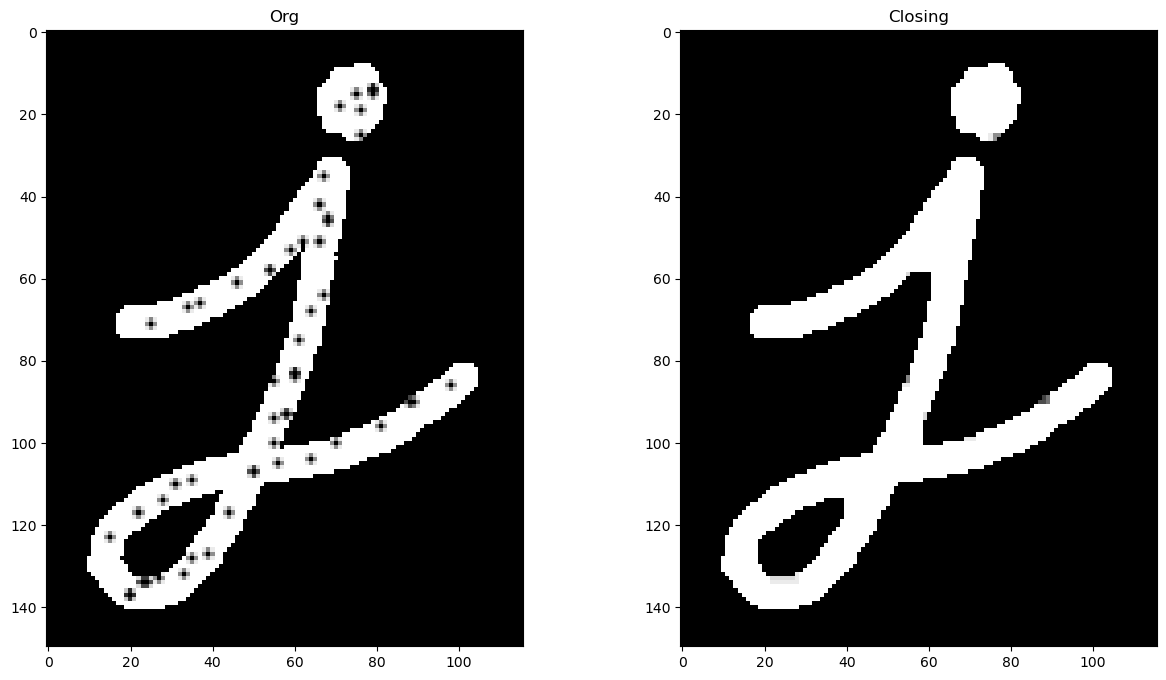

In [10]:
img3 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\j2.png")
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img3, cv.MORPH_CLOSE, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(img3, cmap='gray')
ax1.set_title("Org")
ax2.imshow(closing, cmap='gray')
ax2.set_title("Closing")

Text(0.5, 1.0, 'gradiente')

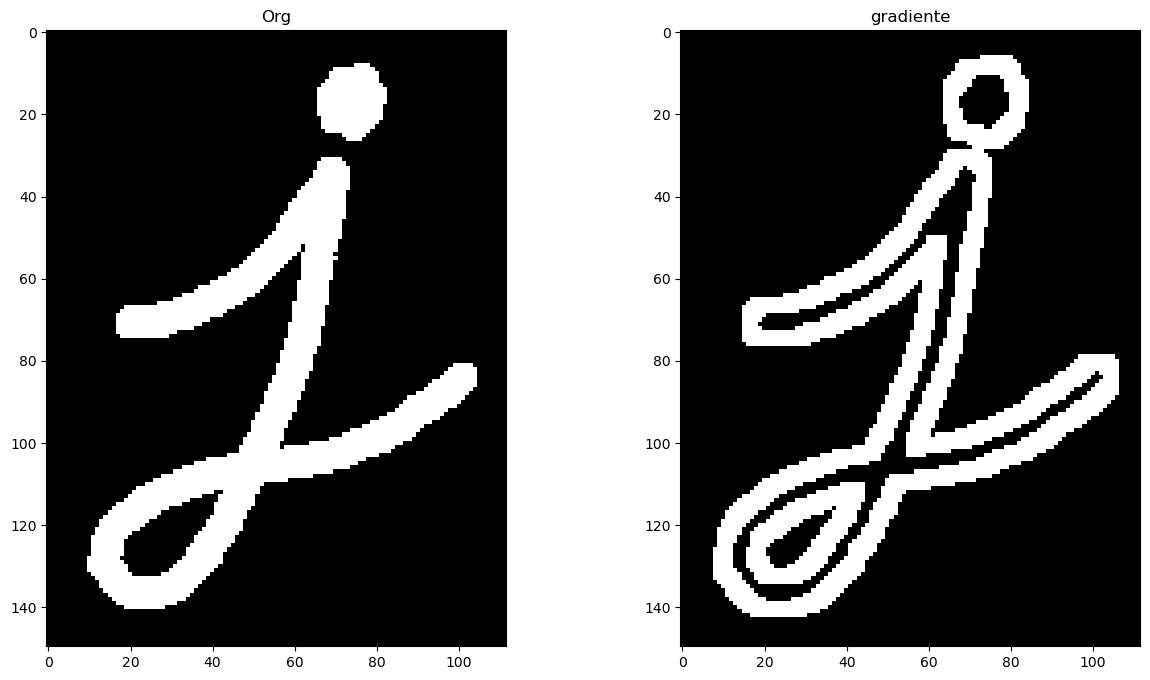

In [11]:
kernel = np.ones((5,5), np.uint8)
closing = cv.morphologyEx(img1, cv.MORPH_GRADIENT, kernel)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(img1, cmap='gray')
ax1.set_title("Org")
ax2.imshow(closing, cmap='gray')
ax2.set_title("gradiente")

### Transformada de distancia
Para sacar el esqueleto de las fotos

Text(0.5, 1.0, 'distancia')

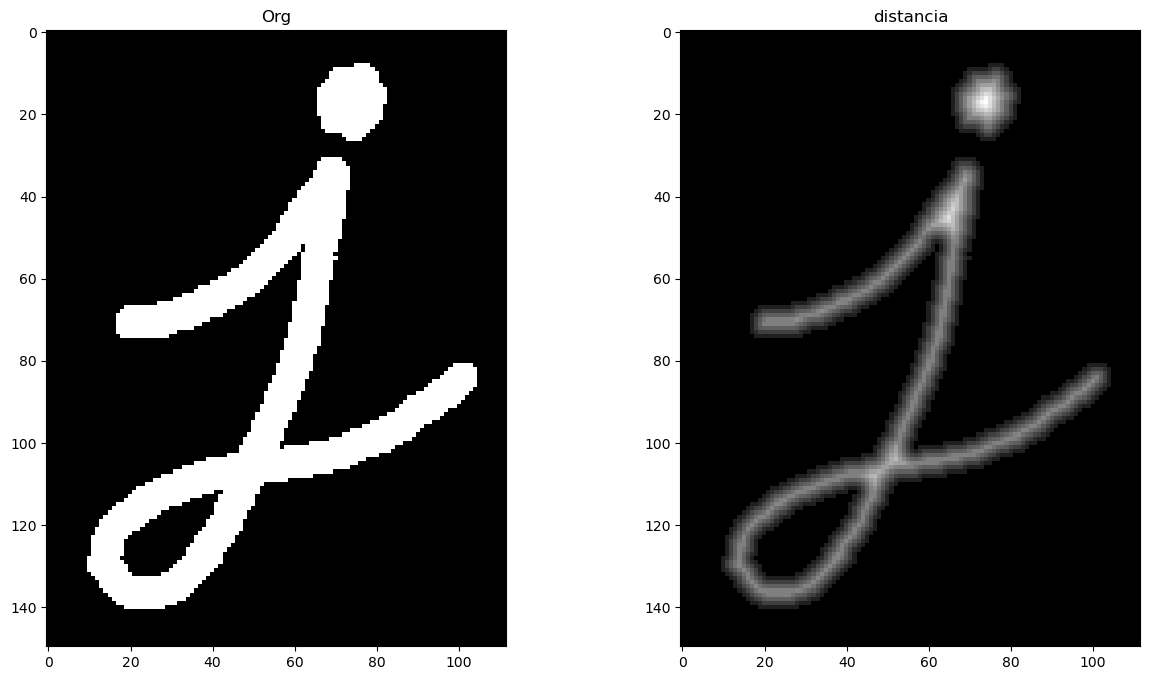

In [14]:
distancia = cv.distanceTransform(img1, cv.DIST_L2, 0)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(img1, cmap='gray')
ax1.set_title("Org")
ax2.imshow(distancia, cmap='gray')
ax2.set_title("distancia")

Text(0.5, 1.0, 'Opening')

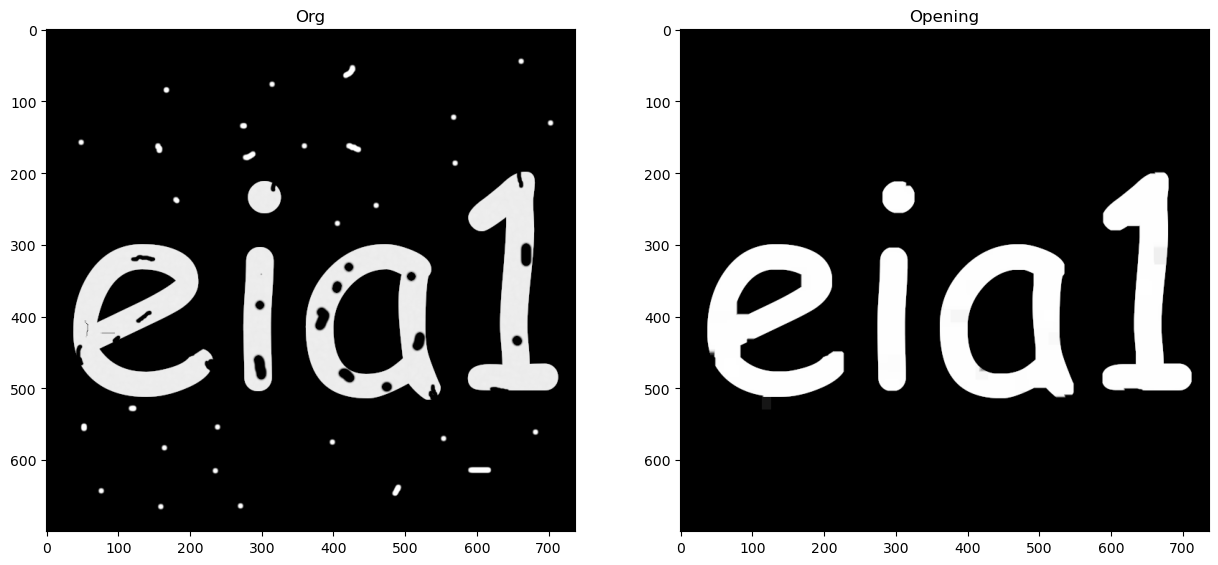

In [17]:
img1 = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\letras.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)


kernel = np.ones((5,5),np.uint8)
img2 = cv.morphologyEx(img1, cv.MORPH_CLOSE, kernel, iterations=4) # limpiamos letras
img2 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel, iterations=3) # limpiamos fondo

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('')

ax1.imshow(img1, cmap='gray')
ax1.set_title("Org")
ax2.imshow(img2, cmap='gray')
ax2.set_title("Opening")

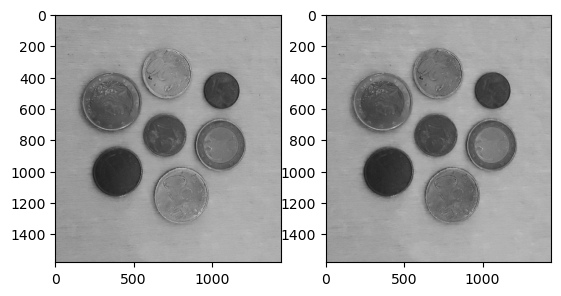

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Programacion de IA\\tirmestre_2\\imagenes\\monedas.jpg")

fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(img[:,:,0],cmap="gray")
img1=img[:,:,0]

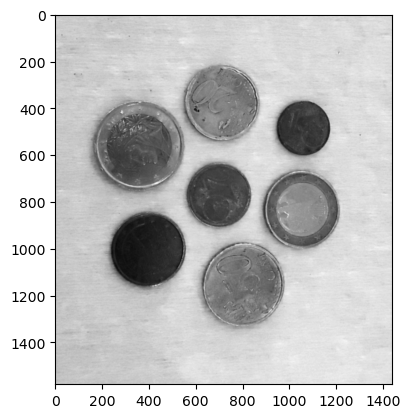

In [4]:
img1 = cv.GaussianBlur(src=img1, ksize=(5,5), sigmaX=20, sigmaY=20)
plt.imshow(img1,cmap="gray")

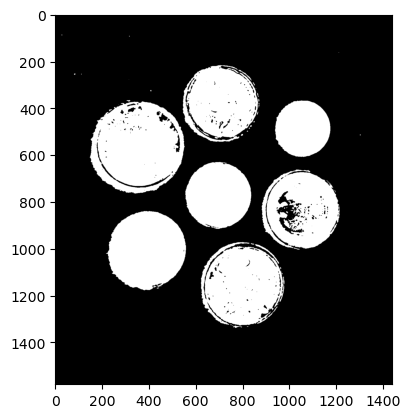

In [5]:
ret,th1 = cv.threshold(img1,127, 255,cv.THRESH_BINARY_INV)
plt.imshow(th1,cmap="gray")

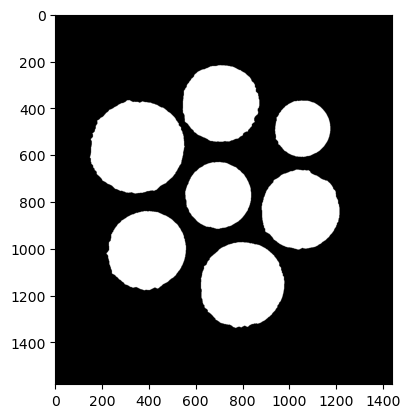

In [6]:
import numpy as np

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (7,7))


img2 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=5)
img2 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel, iterations=1)
plt.imshow(img2,cmap="gray")

### Borde

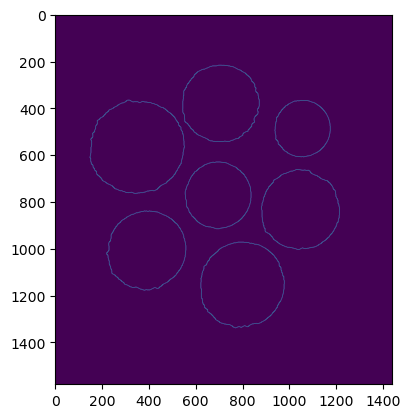

In [7]:
min=50
max=100
cn = cv.Canny(img2,min,max)
plt.imshow(cn)

### Contornos

In [8]:
img_c = img.copy()
contornos,jerarquia = cv.findContours(cn,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))

7


Centro: X:798 Y:1154
Centro: X:390 Y:1007
Centro: X:1046 Y:835
Centro: X:695 Y:773
Centro: X:1055 Y:488
Centro: X:349 Y:567
Centro: X:706 Y:381


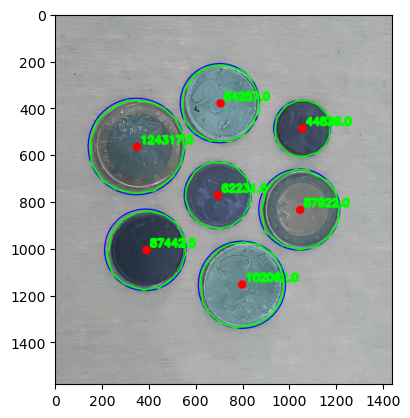

In [9]:
approx=[]

for contorno in contornos:
    M = cv.moments(contorno)
    if M['m00']:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print(f"Centro: X:{cx} Y:{cy}")

        # CENTRO CON TEXTO
        cv.circle(img_c, (cx, cy), 5, (255, 0, 0), 25)
        cv.putText(img_c, str(cv.contourArea(contorno)), (cx+15,cy-15),  cv.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0),12)
        
        # BORDE MÁS REDONDEADO SI NO SERÍA YA PONIENDO EL CONTORNO
        perimetro = cv.arcLength(contorno,True)
        approx.append(cv.approxPolyDP(contorno,0.005*perimetro,True))

        # RADIO REDONDEADO MÍNIMO
        (x,y),radius = cv.minEnclosingCircle(contorno)
        cv.circle(img_c, (int(x), int(y)), int(radius), (0,0,255), 3)

cv.drawContours(img_c,approx,-1,(0,255,0),5)
plt.imshow(img_c)